## DEKOMPOZYCJA STL

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


In [2]:
df = pd.read_csv('data/CO2 dataset.csv')

In [3]:
df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


### 1. Przeprowadź dekompozycję szeregu czasowego za pomocą metody STL, korzystając z modułu dostępnego w bibliotece statsmodels.

In [4]:
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.set_index('Date', inplace=True)

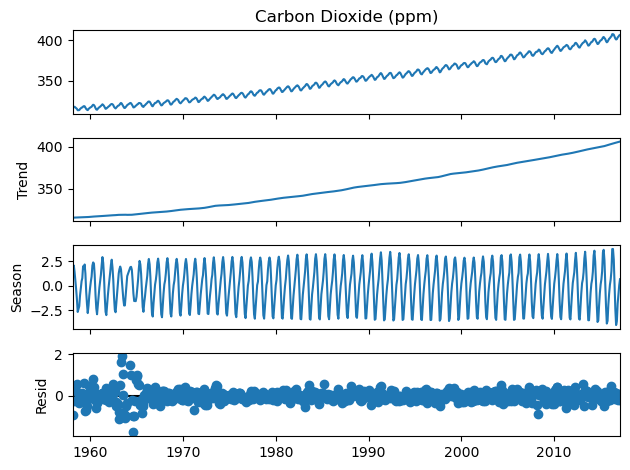

In [5]:
stl = STL(df['Carbon Dioxide (ppm)'].dropna(), period=12)  
result = stl.fit()
result.plot()
plt.show()

### 2. Przeprowadź testy dla różnych wartości parametrów period i seasonal, a następnie spisz swoje obserwacje z przeprowadzonych badań.

Period=3, Seasonal=5


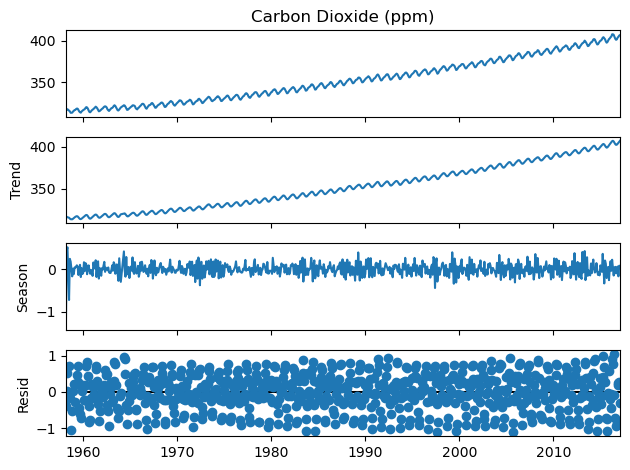

Period=3, Seasonal=7


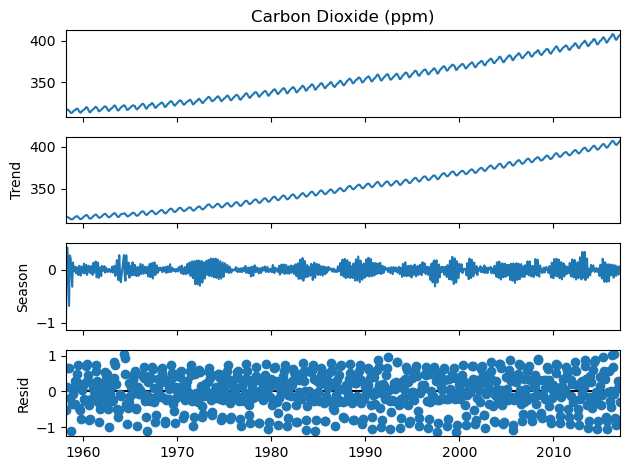

Period=3, Seasonal=9


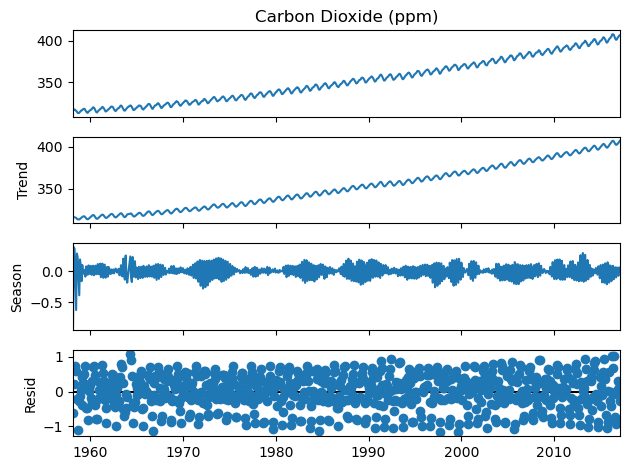

Period=3, Seasonal=11


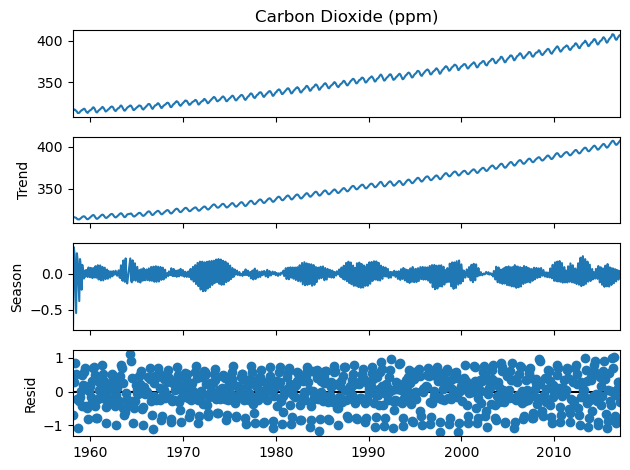

Period=6, Seasonal=5


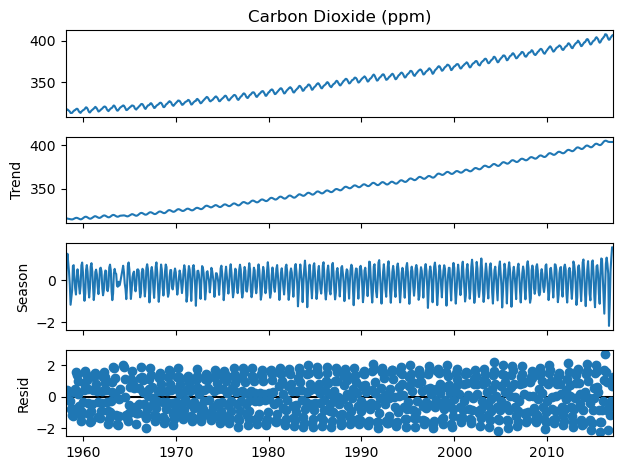

Period=6, Seasonal=7


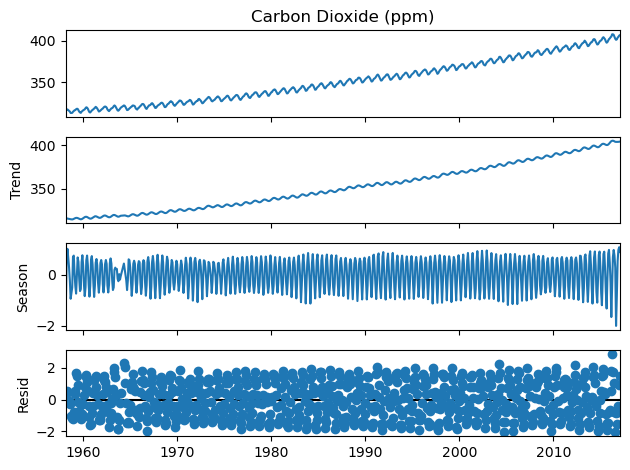

Period=6, Seasonal=9


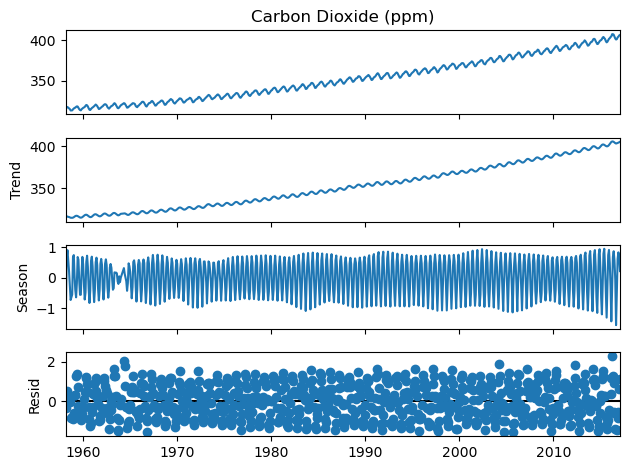

Period=6, Seasonal=11


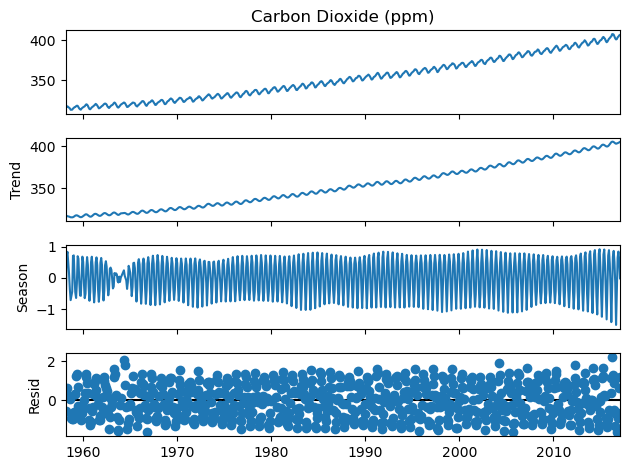

Period=12, Seasonal=5


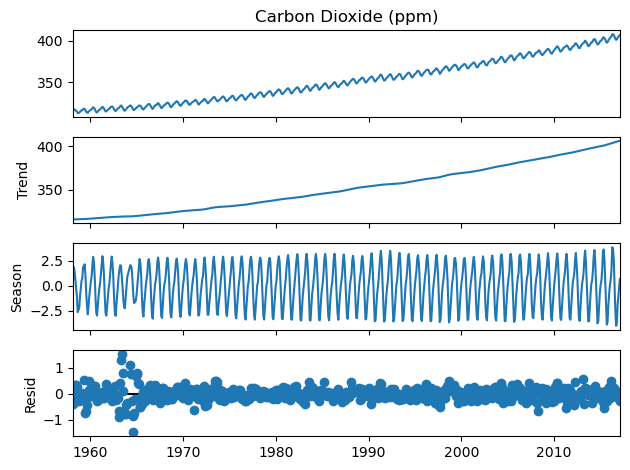

Period=12, Seasonal=7


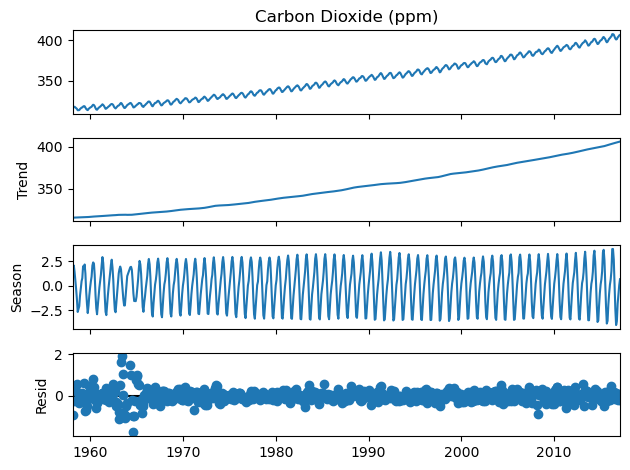

Period=12, Seasonal=9


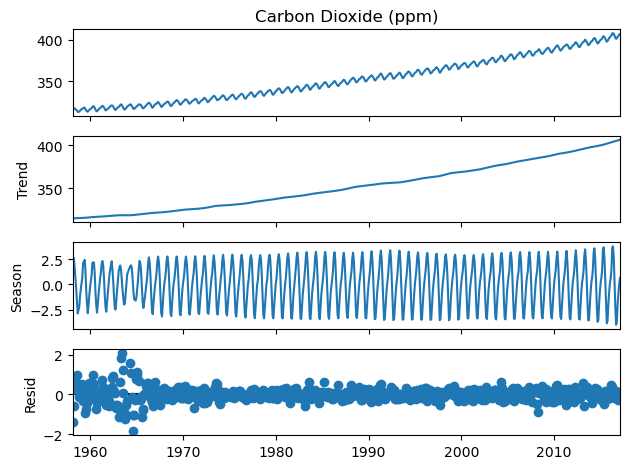

Period=12, Seasonal=11


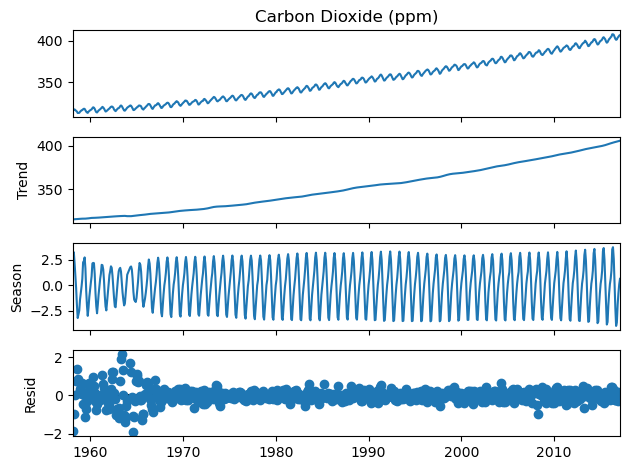

Period=24, Seasonal=5


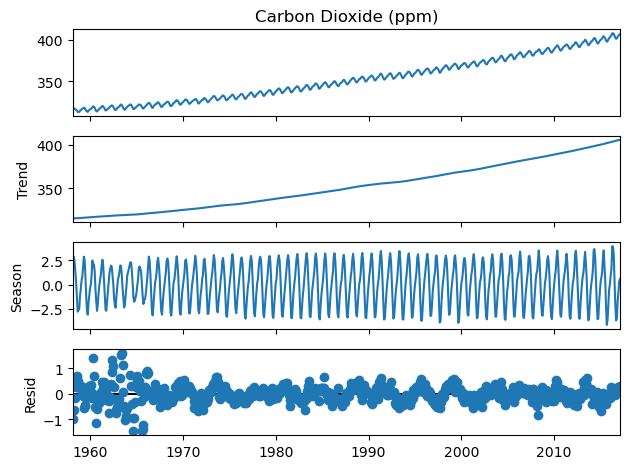

Period=24, Seasonal=7


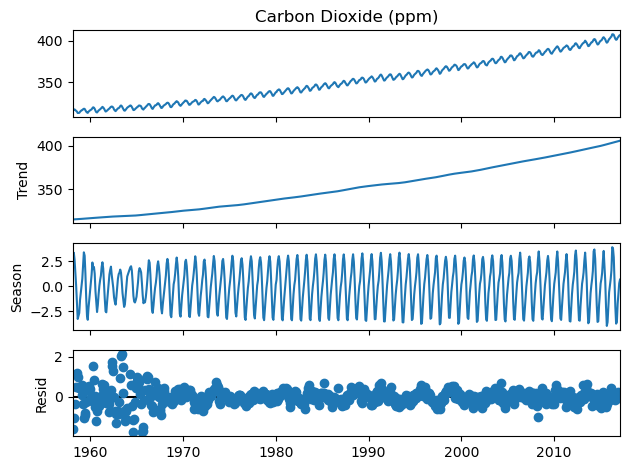

Period=24, Seasonal=9


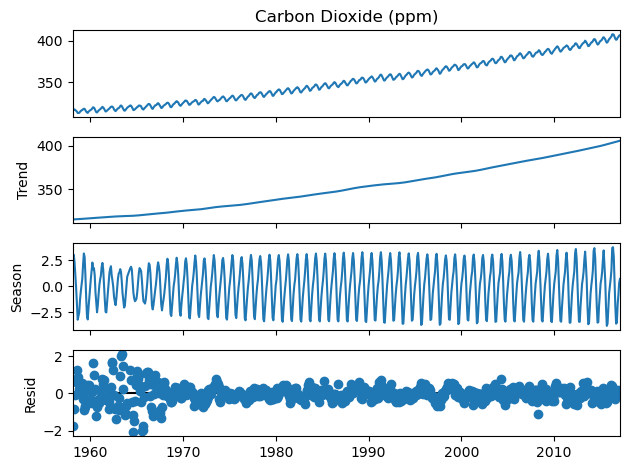

Period=24, Seasonal=11


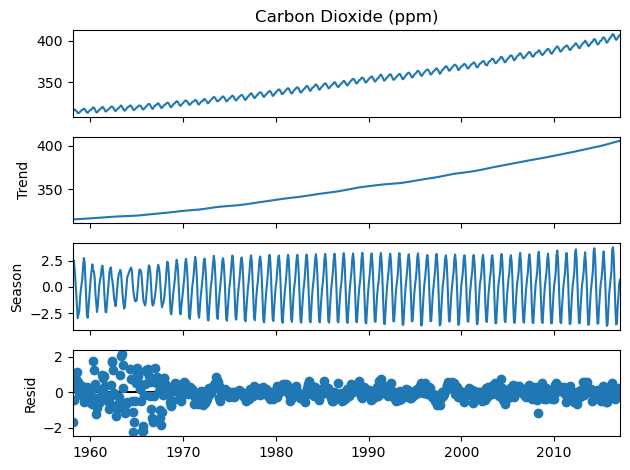

In [6]:
p = [3, 6, 12, 24]
s = [5, 7, 9, 11]

for i, period in enumerate(p):
    for j, seasonal in enumerate(s):
        stl = STL(df['Carbon Dioxide (ppm)'].dropna(), period=period, seasonal=seasonal)
        result = stl.fit()
        print(f"Period={period}, Seasonal={seasonal}")
        result.plot()
        plt.show()

Obserwacje:
- period: mamy do czynienia z 12 miesięcznymi danymi, więc jeśli period ma inną wartość niż wielokrotność 12 to trend i sezonowość wyglądają dziwnie, przyjmują nieprawidłowe wartości. Trend wygląda podobnie jak wejściowy szereg. Dla wielokrotności (24) jedynie rezydua są bardziej "rozrzucone", ale nie wygląda to na duży problem.
- seasonal: wartości w zakresie 5-11 prezentują się na wizualizacjach dosyć podobnie, ale jeśli zwrócić uwagę na rezydua to najlepiej wygląda wartość 5 (najmniejszy rozrzut). Dla innego zestawu danych mogłaby to być jednak inna wartość, więc należy za każdym razem przetestować różne możliwości.

Optymalne wartości parametrów period i seasonal będą zależeć od charakterystyki danych, ich sezonowości oraz stopnia elastyczności, jakiej oczekujemy od dekompozycji.

### 3. Zbadaj różnice w magnitudzie sezonowości pomiędzy stałą a zmienną w czasie (parametr seasonal_deg równy 0 oznacza stałą magnitudę sezonową w czasie). Przedstaw opis wyników swoich badań.

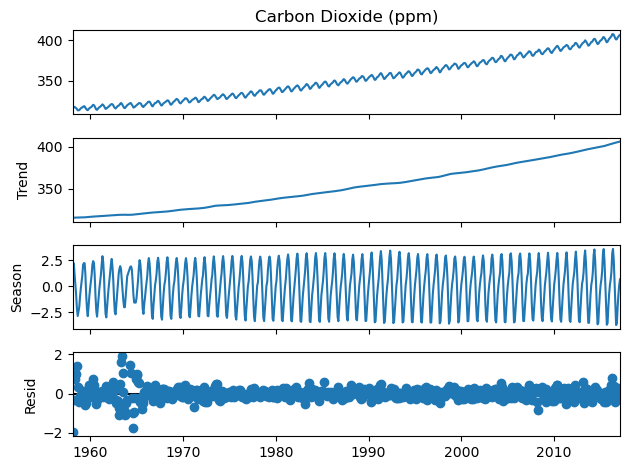

In [7]:
# Degree of seasonal LOESS. 0 (constant) or 1 (constant and trend).

stl = STL(df['Carbon Dioxide (ppm)'].dropna(), period=12, seasonal_deg = 0)  
result = stl.fit()
result.plot()
plt.show()

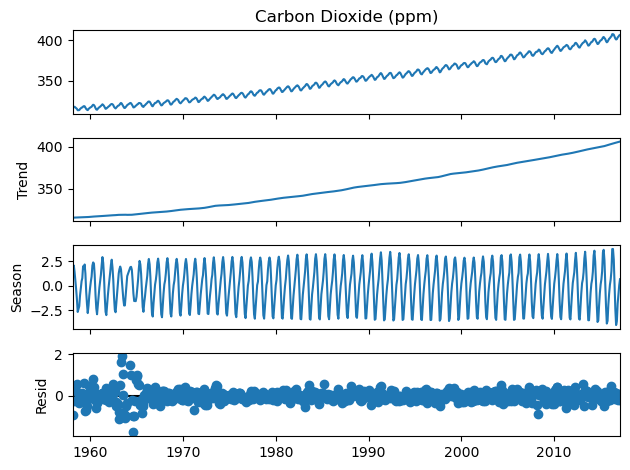

In [8]:
stl = STL(df['Carbon Dioxide (ppm)'].dropna(), period=12, seasonal_deg = 1)  
result = stl.fit()
result.plot()
plt.show()

Wizualizacje prezentuję się bardzo podobnie, nie widać większych różnic. Można jedynie po dłuższej obserwacji zauważyć, że dla magnitudy zmiennej w czasie nie wystepują rezydua o aż tak skrajnych wartościach w porównaniu do stałej.

### 4. Na podstawie wykonanych ćwiczeń z dekompozycji tradycyjnej oraz punktów 1-3 dzisiejszego ćwiczenia, zaleć, którą dekompozycję i dlaczego warto wykorzystać do generowania cech do modelu uczenia maszynowego.

Dekompozycja tradycyjna może być bardziej zrozumiała i intuicyjna dla osób nietechnicznych, ponieważ jest to prosta metoda, która dzieli szereg czasowy na składowe trendu, sezonowości i składników losowych. Natomiast metoda STL oferuje większą elastyczność w dostosowywaniu się do różnych rodzajów danych i sezonowości. Możemy kontrolować okres sezonowy oraz uwzględniać różne formy sezonowości, co może być korzystne, jeśli mamy do czynienia z danymi o złożonej strukturze sezonowej. Dodatkowo metoda ta może być bardziej efektywna w identyfikowaniu skomplikowanych wzorców w danych, zwłaszcza jeśli sezonowość zmienia się dynamicznie w czasie.

Podsumowując, jeśli celem jest szybkie wydobycie podstawowych składowych (trendu, sezonowości, reszty) w sposób prosty i zrozumiały, metoda tradycyjna może być wystarczająca. Jednak jeśli potrzebujemy bardziej zaawansowanego narzędzia, które może lepiej radzić sobie z różnymi rodzajami danych i sezonowości, metoda STL może być lepszym wyborem - to właśnie tą metodę wybrałabym osobiście jeśli miałabym wykorzystać analizę szeregów czasowych w uczeniu maszynowym, ponieważ daje ona większe możliwości.

### 5. Dokonaj interpretacji trendu, sezonowości oraz reszt dla dekompozycji, która Twoim zdaniem przynosi najbardziej optymalne wyniki.

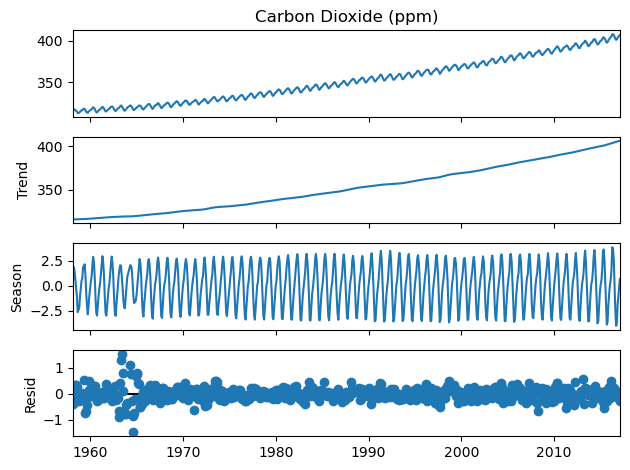

In [9]:
stl = STL(df['Carbon Dioxide (ppm)'].dropna(), period=12, seasonal=5, seasonal_deg=1)  
result = stl.fit()
result.plot()
plt.show()

Interpretacja:
- trend: rosnący praktycznie liniowo na przestrzeni lat.
- sezonowość: poza wahaniami w okolicach 1965 jest stabilna i w miarę stała w czasie. w 1965 być może doszło do jakiejś nieoczekiwanej sytuacji związanej z CO2, albo jest to błąd w danych, nie jestem w stanie tego zinterpretować. Wracając do sezonowości - różnice mają minimalną tendencję do zwiększania się, widać to zwłaszcza w ostatniej dekadzie.
- rezydua: podobnie jak przy sezonowości obserwujemy wahanie jedynie w okolicach 1965 kieyd reszty przyjmują większe wartości, poza tym zachowanie jest stabilne, przyjmują zgodnie z oczekiwaniami wartości wokół 0.